# Converting a Radial RUV file to netCDF and Plotting

In [1]:
from pathlib import Path

from codar_processing.src.radials import Radial
from codar_processing.plotting.plot_nc import plot_radials as ncradialsplot

In [2]:
velocity_min = 0
velocity_max = 200
sub = 1
title = 'CORE HF Radar'

radial_ruv = Path('data/radials/CORE/ideal/2018/201801/20180101/RDL_i_UNC_CORE_2018_01_01_0000.hfrss10lluv')
radial = Radial(radial_ruv)

# Mask the land
radial.mask_over_land()

# Then perform QC
radial.qc_qartod_radial_count()
radial.qc_qartod_valid_location()
radial.qc_qartod_maximum_velocity()
radial.qc_qartod_spatial_median()

/data/conda/miniconda3-py37/envs/dc2020/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


<Figure size 432x288 with 0 Axes>

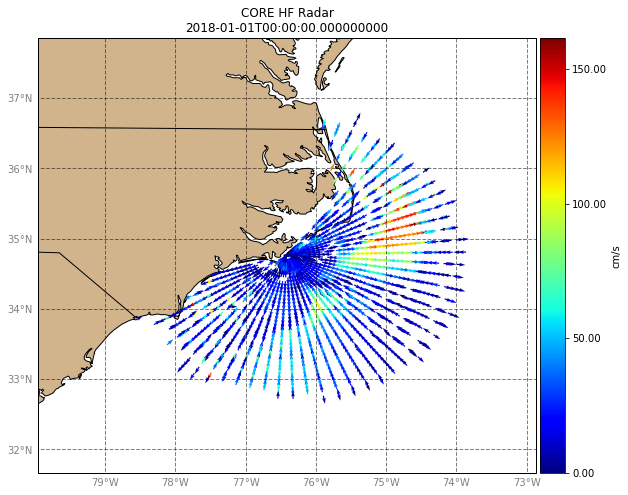

In [3]:
# Plot it directly from an xarray object
ncradialsplot(
    radial.to_xarray(enhance=True),
    velocity_min=velocity_min,
    velocity_max=velocity_max,
    sub=sub,
    title=title
)

<Figure size 864x612 with 0 Axes>

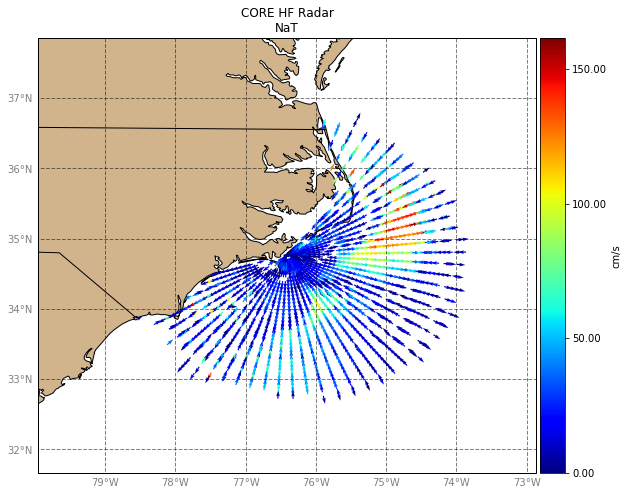

In [4]:
## Create netCDF file from the Radial file
qc_radial_nc = Path('output/RDL_i_UNC_CORE_2018_01_01_0000.qc.nc')
radial.export(str(qc_radial_nc), file_type='netcdf')

# Plot from netCDF file
ncradialsplot(
    qc_radial_nc,
    velocity_min=velocity_min,
    velocity_max=velocity_max,
    sub=sub, title=title
)